In [1]:
from scipy.io import loadmat
from scipy.signal import find_peaks
import numpy as np
from pathlib import Path
from typing import List, Tuple
import pickle
import matplotlib.pyplot as plt
import itertools
import torch
import torch.nn as nn
import numpy as np
import sys
from sklearn.metrics import mean_squared_error
import csv
import pandas as pd
import os

/home/witvoetk/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# does the same as extract_csv_file_chunks but for excel files
def extract_excel_file_chunks(excel_files: str) -> List[Tuple[np.ndarray, np.ndarray]]:

    #reads all excel files in the folder
    x_chunks = []
    y_chunks = []
    for excel_file in excel_files:
        df = pd.read_excel("Data/philcar/"+excel_file, sheet_name=None)        

        soc = []
        v = []
        i = []
        t = []

        for sheet in df:
            if 'HV Battery SOC [%]' in df[sheet].columns:
                soc = df[sheet]['HV Battery SOC [%]']
            if 'HV Battery Voltage [V]' in df[sheet].columns:
                v = df[sheet]['HV Battery Voltage [V]']
            if 'HV Battery Current [A]' in df[sheet].columns:
                i = df[sheet]['HV Battery Current [A]']
            if 'OAT [degC]' in df[sheet].columns:
                t = df[sheet]['OAT [degC]']
        
        # ensures that all columns are found
        if len(soc) == 0 or len(v) == 0 or len(i) == 0 or len(t) == 0:
            print('Error: NaN value in file ' + excel_file)
            continue
        else:
            print('Found all columns in file ' + excel_file)

            # iterate through the lists and write the data to the chunks
            x_chunk = []
            y_chunk = []
            for x in range(len(soc)):
                # double check that the data is not NaN
                if soc[x] == soc[x] and v[x] == v[x] and i[x] == i[x] and t[x] == t[x]:
                    x_chunk.append([v[x], i[x], t[x]])
                    y_chunk.append([soc[x]])

            # convert the lists to numpy arrays
            x_chunk = np.array(x_chunk)
            y_chunk = np.array(y_chunk)


            x_chunks.append(x_chunk)
            y_chunks.append(y_chunk)

    return list(zip(x_chunks, y_chunks))

In [3]:
# grabs all the excel files from the parent directory in folder Data/philcar
excel_files = [f for f in os.listdir('Data/philcar') if f.endswith('.xlsx')]
excel_files.sort()

all_chunks = extract_excel_file_chunks(excel_files)


Found all columns in file Phil_DC_023_12degC.xlsx
Found all columns in file Phil_DC_026_11degC.xlsx
Found all columns in file Phil_DC_034_22degC.xlsx
Found all columns in file Phil_DC_053_25degC.xlsx
Found all columns in file Phil_DC_089_14degC.xlsx
Found all columns in file Phil_DC_10_-1degC.xlsx
Found all columns in file Phil_DC_11_-3degC.xlsx
Found all columns in file Phil_DC_12_-5degC.xlsx
Found all columns in file Phil_DC_13_3degC.xlsx
Found all columns in file Phil_DC_14_-4degC.xlsx
Found all columns in file Phil_DC_15_-5degC.xlsx
Found all columns in file Phil_DC_16_-1degC.xlsx
Found all columns in file Phil_DC_17_-7degC.xlsx
Found all columns in file Phil_DC_18_-7degC.xlsx
Found all columns in file Phil_DC_19_4degC.xlsx
Found all columns in file Phil_DC_1_14degC.xlsx
Found all columns in file Phil_DC_20_3degC.xlsx
Found all columns in file Phil_DC_21_6degC.xlsx
Found all columns in file Phil_DC_22_7degC.xlsx
Found all columns in file Phil_DC_24_-1degC.xlsx
Found all columns in 

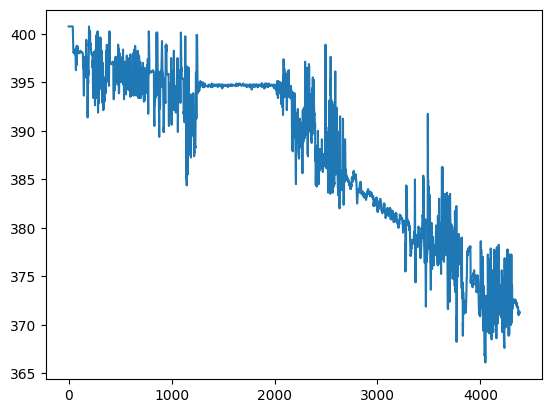

In [4]:
#plots V in the first chunk
plt.plot(all_chunks[0][0][:,0])

In [ ]:
#removes any rows where V < 300
def remove_low_voltage(x_chunks: List[np.ndarray], y_chunks: List[np.ndarray]) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    x_chunks_new = []
    y_chunks_new = []
    for x_chunk, y_chunk in zip(x_chunks, y_chunks):
        x_chunk_new = []
        y_chunk_new = []
        for x, y in zip(x_chunk, y_chunk):
            if x[0] > 300:
                x_chunk_new.append(x)
                y_chunk_new.append(y)
        x_chunks_new.append(np.array(x_chunk_new))
        y_chunks_new.append(np.array(y_chunk_new))
    return x_chunks_new, y_chunks_new

remove_low_voltage(all_chunks[0], all_chunks[1])

In [ ]:
# plot V in all chunks
def plot_voltage(x_chunks: List[np.ndarray], y_chunks: List[np.ndarray]) -> None:
    for x_chunk, y_chunk in zip(x_chunks, y_chunks):
        plt.plot(x_chunk[:, 0])
    plt.show()

plot_voltage(all_chunks[0], all_chunks[1])